In [1]:
import numpy as np

In [2]:
h = [2,1,0]
x = [3,4,5]

y = np.convolve(x,h)
y

array([ 6, 11, 14,  5,  0])

In [7]:
x = [6,2]
h = [1,2,5,4]

#y = np.convolve(x,h,"full") # 0[1,2,5,4]0
#output "[6,14,34,34,8]"
#y = np.convolve(x,h,"same") # 0[1,2,5,4]
#output [6,14,34,34]
y = np.convolve(x,h,"valid") # [1,2,5,4]
#output [14,34,34]

array([14, 34, 34])

In [9]:
from scipy import signal as sg

In [11]:

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,1]]

print('without zero padding \n')
print('{0}\n'.format(sg.convolve(I,g,'valid')))

print('with zero padding')
print('{0}\n'.format(sg.convolve(I,g)))

without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]]

with zero padding
[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]



In [12]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix


print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


## Coding with Tensorflow
Suppose that we have two tensors:

* 3x3 filter (4D tensor = [3,3,1,1] = [width,height,channels,number of filters])
* 10x10 image (4D tensor = [1,10,10,1 = [batch size,width,height,number of channels]])

The output size for zero padding 'Same' mode will be:
* the same as input 10x10

The output size without padding 'valid' mode will be :
* input size - kernel dimension + 1  = 10 - 3 + 1  = 8 = 8x8

In [13]:
import tensorflow as tf

In [15]:
input = tf.Variable(tf.random_normal([1,10,10,1]))
filter = tf.Variable(tf.random_normal([3,3,1,1]))
op = tf.nn.conv2d(input,filter,strides=[1,1,1,1],padding='VALID')
op2 = tf.nn.conv2d(input,filter,strides=[1,1,1,1],padding='SAME')
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print("Input \n")
    print('{0}\n'.format(input.eval()))
    print("Kernel \n")
    print('{0}\n'.format(filter.eval()))
    print("Result with valid convolution")
    result = sess.run(op)
    print(result)
    print("Result with same convolution")
    result2= sess.run(op2)
    print(result2)

Input 

[[[[-0.79653102]
   [ 0.65772653]
   [ 0.26363951]
   [ 0.02958575]
   [ 0.25502932]
   [-0.48706311]
   [ 0.08134972]
   [-0.51896435]
   [ 0.58933854]
   [ 0.36100796]]

  [[-0.09063853]
   [ 0.60158199]
   [ 0.71082801]
   [ 0.24277736]
   [-0.51606166]
   [-0.62345648]
   [ 0.47745341]
   [ 1.24058163]
   [ 1.16436636]
   [ 0.14281586]]

  [[ 0.72628462]
   [ 0.08056495]
   [-0.31632912]
   [-1.0075227 ]
   [ 1.68147445]
   [-0.26291057]
   [-0.4243792 ]
   [-1.21799409]
   [-0.02066291]
   [-0.21914643]]

  [[-0.17880462]
   [ 0.51316047]
   [ 0.31634256]
   [-0.27342287]
   [ 0.48809114]
   [ 0.48187429]
   [ 0.23906809]
   [ 1.85945857]
   [ 0.06247348]
   [-0.64822322]]

  [[ 0.94868904]
   [ 0.66031569]
   [ 0.14877197]
   [ 1.03695464]
   [ 0.66971993]
   [-1.37383187]
   [ 0.69667381]
   [ 0.93007618]
   [ 0.21656339]
   [ 2.03435588]]

  [[-0.97931826]
   [-1.25594485]
   [ 0.50105101]
   [ 2.57647443]
   [ 0.0356449 ]
   [-2.26726055]
   [ 0.07182445]
   [-0.263413

## Apply with real image

In [20]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image


 Original type: <PIL.Image.Image image mode=L size=5184x3456 at 0x1F0E72562E8> 


After conversion to numeriacal representation: 

 array([[ 24,  24,  24, ..., 148, 147, 149],
       [ 23,  23,  24, ..., 148, 147, 145],
       [ 23,  23,  23, ..., 149, 146, 146],
       ..., 
       [ 54,  57,  58, ..., 184, 184, 186],
       [ 56,  56,  56, ..., 184, 184, 184],
       [ 51,  51,  54, ..., 186, 186, 186]], dtype=uint8)

 Input image converted to gray scale: 



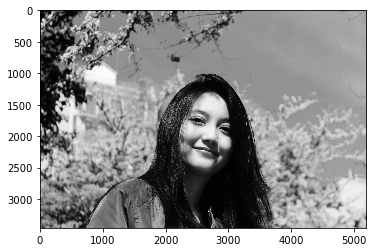

In [26]:
im = Image.open("1.jpg")

#convert to grey scale
image_gr = im.convert("L")
print("\n Original type: %r \n\n" %image_gr)

#convert image to matrix with value from 0 to 255
arr = np.asarray(image_gr)
print("After conversion to numeriacal representation: \n\n %r" % arr)

%matplotlib inline
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

GRADIENT MAGNITUDE - Feature map


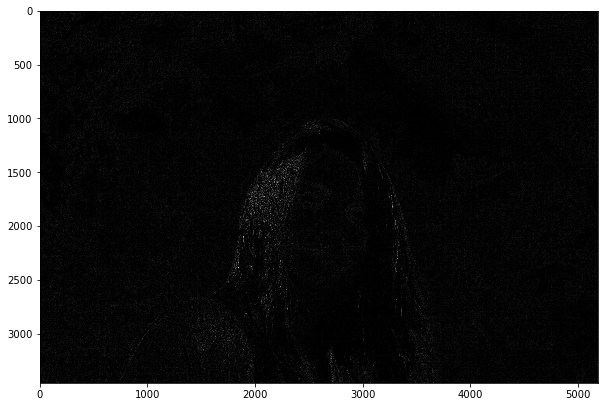

In [29]:
kernel = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0],
])

#we are using an edge detector kernel
grad = signal.convolve2d(arr,kernel,mode = 'same',boundary = 'symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

GRADIENT MAGNITUDE - Feature map


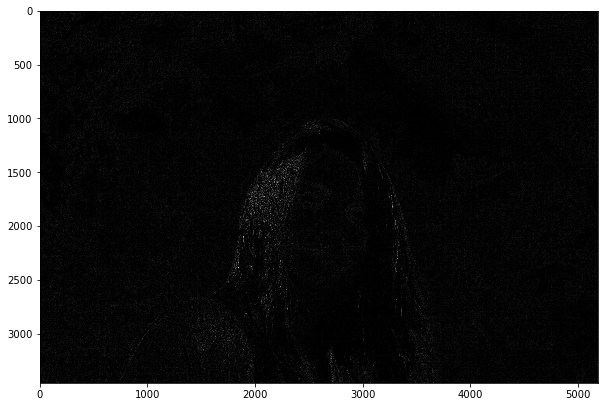

In [31]:
type(grad)
grad_biases = np.absolute(grad) + 100
grad_biases[grad_biases > 255] = 255

%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')